In [166]:
import pandas as pd

In [167]:
weather_df = pd.read_csv('Weather Dataset.csv')
weather_df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
3775,2006-08-11 02:00:00.000 +0200,Mostly Cloudy,rain,15.844444,15.844444,0.84,3.5259,315.0,14.9569,0.0,1009.37,Partly cloudy throughout the day.
3776,2006-12-26 12:00:00.000 +0100,Partly Cloudy,rain,2.488889,-1.516667,0.61,16.1000,53.0,9.9820,0.0,1038.38,Foggy starting overnight continuing until morn...
3777,2006-12-19 20:00:00.000 +0100,Overcast,rain,2.222222,-1.816667,0.92,15.9551,0.0,6.2951,0.0,1027.40,Overcast throughout the day.
3778,2006-12-10 11:00:00.000 +0100,Partly Cloudy,rain,8.794444,6.922222,0.83,11.6886,300.0,11.2056,0.0,1024.55,Foggy in the morning.


In [168]:
# Drop rows with missing values & duplicate rows
weather_df = weather_df.drop_duplicates()
weather_df = weather_df.dropna()
print(weather_df.isnull().sum())    # double checking for missing values
weather_df.describe()               # to check for unrealistic values

Formatted Date              0
Summary                     0
Precip Type                 0
Temperature (C)             0
Apparent Temperature (C)    0
Humidity                    0
Wind Speed (km/h)           0
Wind Bearing (degrees)      0
Visibility (km)             0
Loud Cover                  0
Pressure (millibars)        0
Daily Summary               0
dtype: int64


,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000,2521.000000
mean,9.344367,9.071731,0.014304,10.011831,201.519635,8.034247,-0.793336,994.984732
std,40.993225,9.926594,39.849472,5.962815,91.274419,40.266185,39.833051,151.674735
min,-2000.000000,-11.911111,-2000.000000,0.000000,0.000000,-2000.000000,-2000.000000,0.000000
25%,2.155556,-0.294444,0.710000,5.313000,146.000000,5.538400,0.000000,1010.780000
50%,10.577778,10.577778,0.860000,9.402400,198.000000,9.982000,0.000000,1015.180000
75%,17.150000,17.150000,0.930000,13.652800,280.000000,11.270000,0.000000,1023.520000
max,32.638889,35.494444,1.000000,36.386000,359.000000,16.100000,0.000000,1042.310000


In [169]:
#Remove rows with unrealistic temperature, humidity, visibility & Pressure values
weather_df = weather_df[(weather_df['Temperature (C)'] >= -50) & (weather_df['Temperature (C)'] <= 50)]
weather_df = weather_df[(weather_df['Humidity'] >= 0 )& (weather_df['Humidity'] <= 1)]
weather_df = weather_df[(weather_df['Pressure (millibars)'] >= 870)& (weather_df['Pressure (millibars)'] <= 1085)]
weather_df = weather_df[(weather_df['Visibility (km)'] >= 0 )]
# drop Loud Cover column
weather_df = weather_df.drop('Loud Cover', axis=1)
# double checking 
weather_df.describe()
weather_df 


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...
2515,2006-02-20 19:00:00.000 +0100,Partly Cloudy,rain,9.094444,6.594444,0.82,16.8084,129.0,9.9820,1010.08,Mostly cloudy starting overnight continuing un...
2516,2006-02-20 20:00:00.000 +0100,Mostly Cloudy,rain,8.905556,5.827778,0.78,21.8799,140.0,9.9820,1009.57,Mostly cloudy starting overnight continuing un...
2517,2006-02-20 21:00:00.000 +0100,Mostly Cloudy,rain,8.883333,5.527778,0.74,24.9228,150.0,15.8263,1009.60,Mostly cloudy starting overnight continuing un...
2518,2006-02-20 22:00:00.000 +0100,Mostly Cloudy,rain,8.266667,5.272222,0.77,19.3522,170.0,14.9569,1010.34,Mostly cloudy starting overnight continuing un...


In [170]:
import matplotlib.pyplot as plt

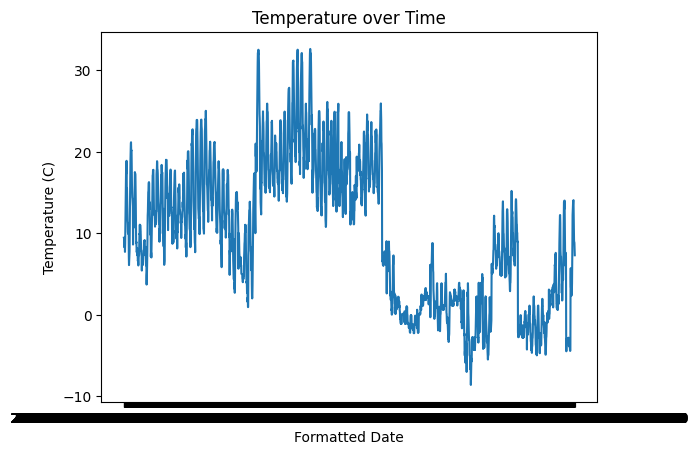

In [171]:
plt.plot(weather_df['Formatted Date'],weather_df['Temperature (C)'])
plt.xlabel('Formatted Date')
plt.ylabel('Temperature (C)')
plt.title('Temperature over Time')
plt.show()

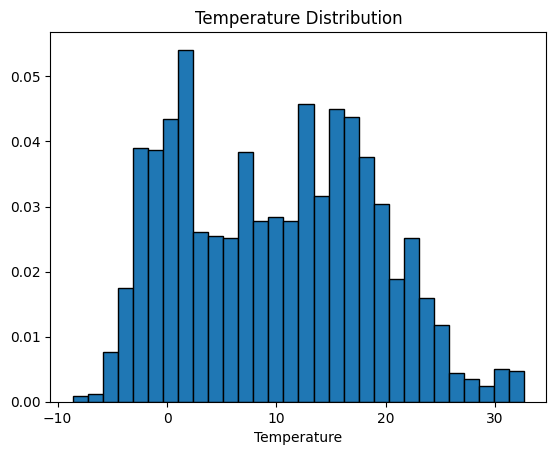

In [172]:
plt.hist(weather_df['Temperature (C)'], bins=30, density=True, edgecolor='black')   # density=True makes the y axis in probability
                                                                                    # edgecolor='black' for better view
plt.xlabel('Temperature')
plt.title('Temperature Distribution')
plt.show()

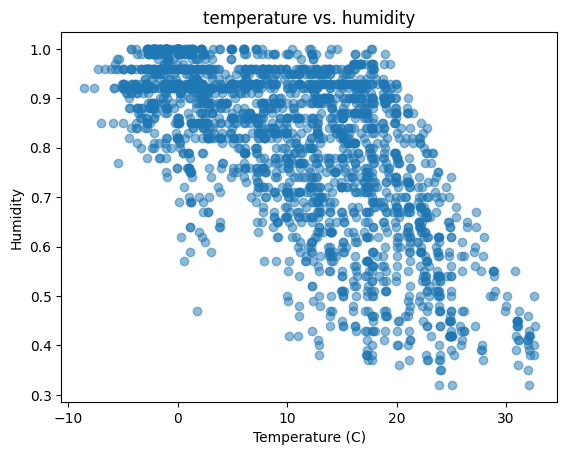

In [173]:
plt.scatter(weather_df['Temperature (C)'],weather_df['Humidity'], alpha=0.5)    #alpha=0.5 = transparency 50%, so that overlapping points are more clear
plt.xlabel('Temperature (C)')
plt.ylabel('Humidity')
plt.title('temperature vs. humidity')
plt.show()

In [174]:
import seaborn as sns

In [175]:
# Select only numeric columns
numeric_df = weather_df.select_dtypes(include=[float, int])
# Compute the correlation matrix
corr = numeric_df.corr()


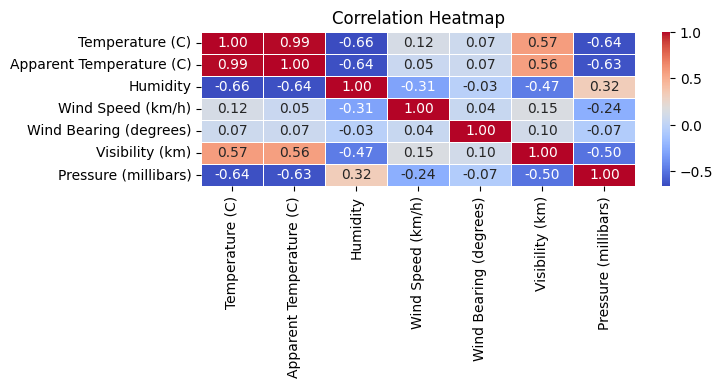

In [176]:
# Plot the heatmap
plt.figure(figsize=(7, 2))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)   #annot=True: Displays correlation values in each cell
                                                                            #cmap='coolwarm': Uses a color map to show different levels of correlation
                                                                            #fmt='.2f': Formats annotation values to two decimal places
                                                                            #linewidths=0.5: Adds lines between cells for better view
plt.title('Correlation Heatmap')
plt.show()


Legend: 
1. Strong positive correlation:     -as one increases the other increases at almost the same rate
2. Moderate positive correlation:   -as one increases the other increases moderately
3. Weak positive correlation:       -as one increases the other increases at a very small rate
4. Strong negative correlation:     -as one increases the other decreases at almost the same rate
5. Moderate negative correlation:   -as one increases the other decreases moderately
6. Weak negative correlation:       -as one increases the other decreases at a very small rate

The output of each correlation explained:
1. Temperature & Apparant temperature obviously have a very strong positive correlation
2. Temperature & Humidity have a Moderate negative correlation
3. Temperature & Wind speed have a Weak positive correlation
4. Temperature & Wind bearing have a very Weak positive correlation, almost none
5. Temperature & Visibility have a Moderate positive correlation
6. Temperature & pressure have a Moderate negative correlation

7. Apparant temperature & Humidity have a Moderate negative correlation
8. Apparant temperature & Wind speed have a very Weak positive correlation, almost none
9. Apparant temperature & Wind bearing have a very Weak positive correlation, almost none
10. Apparant temperature & Visibility have a Moderate positive correlation
11. Apparant temperature & pressure have a Moderate negative correlation

12. Humidity & Wind speed have a Moderate negative correlation
13. Humidity & Wind bearing have a very Weak negative correlation, almost none
14. Humidity & Visibility have a Moderate negative correlation
15. Humidity & pressure have a Moderate positive correlation

16. Wind speed & Wind bearing have a very Weak positive correlation, almost none
17. Wind speed & Visibility have a Weak positive correlation
18. Wind speed & pressure have a Moderate negative correlation

19. Wind bearing & Visibility have a Weak positive correlation
20. Wind bearing & pressure have a very Weak negative correlation, almost none

21. Visibility & pressure have a Moderate negative correlation